In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [2]:
column_names = ["id", "topic", "sentiment", "text"]
df = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv", names=column_names)
df.head()

,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df.shape

(74682, 4)

**Observation**
* We are interested only in sentiment and text column here. So we're going to drop other columns

In [4]:
df2 = df[["sentiment", "text"]]
df2.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df2.sentiment.value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

**Observation**
* We are not interested in "Irrelevant" sentiment. So we're going to drop thease rows

In [6]:
df3 = df2[df2.sentiment != "Irrelevant"]
df3.sentiment.value_counts()

sentiment
Negative    22542
Positive    20832
Neutral     18318
Name: count, dtype: int64

In [7]:
df3.isna().sum()

sentiment      0
text         571
dtype: int64

**Observation**
* There are 571 null values in Text column. As the number is a small fraction compared to total counts, we are going to drop these null values

In [8]:
df4 = df3.copy()
df4.dropna(inplace=True)
df4.isna().sum()

sentiment    0
text         0
dtype: int64

# Model Building without Text Preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
sentiment_numbers = {"Neutral": 0, "Negative": 1, "Positive": 2}

df4["sentiment_num"] = df4.sentiment.map(sentiment_numbers)
df4.head()

,sentiment,text,sentiment_num
0,Positive,im getting on borderlands and i will murder yo...,2
1,Positive,I am coming to the borders and I will kill you...,2
2,Positive,im getting on borderlands and i will kill you ...,2
3,Positive,im coming on borderlands and i will murder you...,2
4,Positive,im getting on borderlands 2 and i will murder ...,2


In [11]:
df4.sentiment.value_counts()

sentiment
Negative    22358
Positive    20655
Neutral     18108
Name: count, dtype: int64

In [12]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df4.text, df4.sentiment_num, test_size=0.2, random_state=42, stratify=df4.sentiment_num)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(48896,) (48896,)
(12225,) (12225,)


In [13]:
#Random Forest with CountVectorizer unigram

clf_1 = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 1))),
    ("classifier", RandomForestClassifier(n_estimators=100, criterion="entropy", n_jobs=-1))
])

clf_1.fit(X_train, y_train)

y_pred = clf_1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3622
           1       0.94      0.95      0.94      4472
           2       0.93      0.94      0.94      4131

    accuracy                           0.94     12225
   macro avg       0.94      0.93      0.94     12225
weighted avg       0.94      0.94      0.94     12225



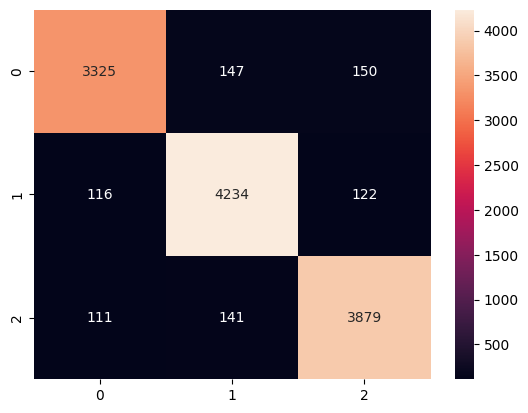

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3622
           1       0.94      0.95      0.94      4472
           2       0.93      0.94      0.94      4131

    accuracy                           0.93     12225
   macro avg       0.93      0.93      0.93     12225
weighted avg       0.93      0.93      0.93     12225



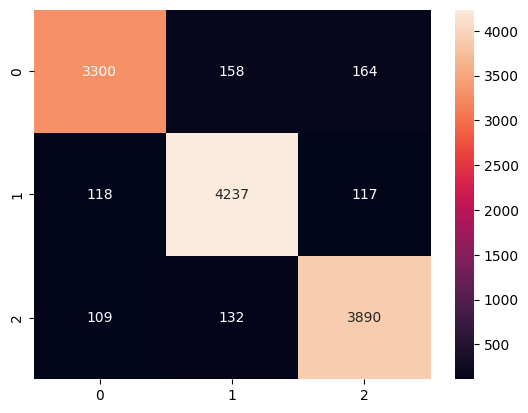

In [15]:
#Random Forest with CountVectorizer unigram & bigrams

clf_2 = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 2))),
    ("classifier", RandomForestClassifier(n_estimators=100, criterion="entropy", n_jobs=-1))
])

clf_2.fit(X_train, y_train)

y_pred_2 = clf_2.predict(X_test)
print(classification_report(y_test, y_pred_2))

cm2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cm2, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3622
           1       0.93      0.95      0.94      4472
           2       0.94      0.94      0.94      4131

    accuracy                           0.94     12225
   macro avg       0.94      0.93      0.94     12225
weighted avg       0.94      0.94      0.94     12225



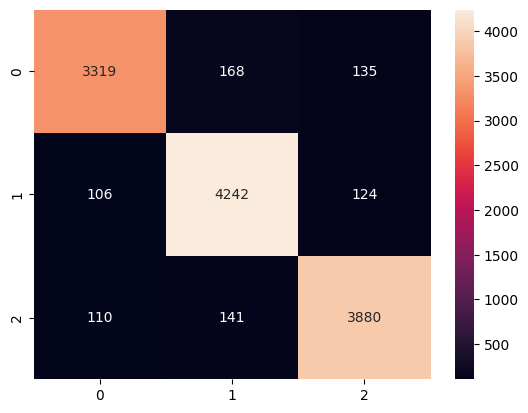

In [16]:
#Random Forest with TfIdfVectorizer

clf_3 = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("classifier", RandomForestClassifier(n_estimators=100, criterion="entropy", n_jobs=-1))
])

clf_3.fit(X_train, y_train)

y_pred_3 = clf_3.predict(X_test)
print(classification_report(y_test, y_pred_3))

cm3 = confusion_matrix(y_test, y_pred_3)
sns.heatmap(cm3, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.87      0.68      0.76      3622
           1       0.78      0.87      0.82      4472
           2       0.79      0.83      0.81      4131

    accuracy                           0.80     12225
   macro avg       0.81      0.80      0.80     12225
weighted avg       0.81      0.80      0.80     12225



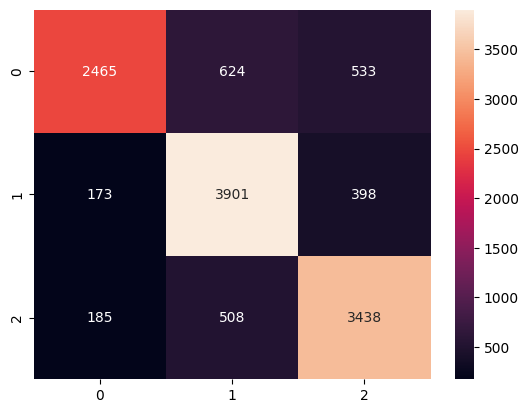

In [17]:
#MultinomialNB with CountVectorizer unigram

clf_4 = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 1))),
    ("classifier", MultinomialNB())
])

clf_4.fit(X_train, y_train)

y_pred_4 = clf_4.predict(X_test)
print(classification_report(y_test, y_pred_4))

cm4 = confusion_matrix(y_test, y_pred_4)
sns.heatmap(cm4, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3622
           1       0.88      0.95      0.91      4472
           2       0.91      0.92      0.91      4131

    accuracy                           0.91     12225
   macro avg       0.91      0.91      0.91     12225
weighted avg       0.91      0.91      0.91     12225



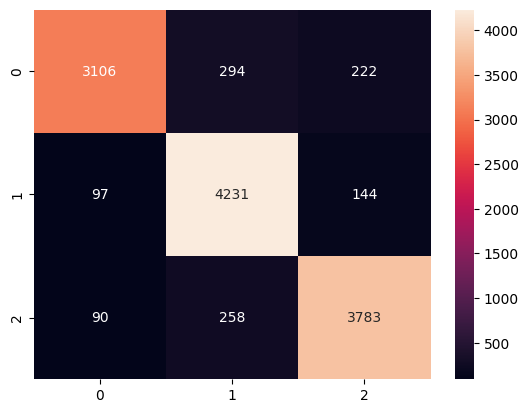

In [18]:
#MultinomialNB with CountVectorizer unigram and bigrams

clf_5 = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 2))),
    ("classifier", MultinomialNB())
])

clf_5.fit(X_train, y_train)

y_pred_5 = clf_5.predict(X_test)
print(classification_report(y_test, y_pred_5))

cm5 = confusion_matrix(y_test, y_pred_5)
sns.heatmap(cm5, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3622
           1       0.88      0.95      0.91      4472
           2       0.91      0.92      0.91      4131

    accuracy                           0.91     12225
   macro avg       0.91      0.91      0.91     12225
weighted avg       0.91      0.91      0.91     12225



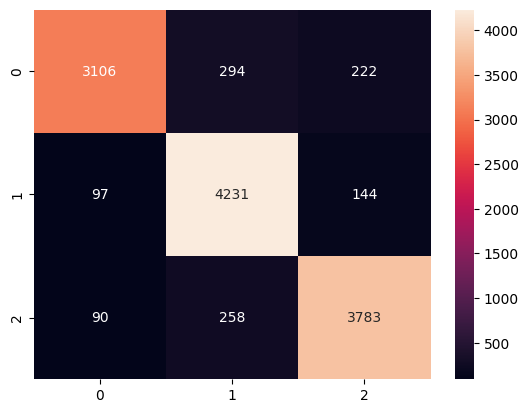

In [19]:
#MultinomialNB with TfIdfVectorizer

clf_6 = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("classifier", MultinomialNB())
])

clf_6.fit(X_train, y_train)

y_pred_6 = clf_5.predict(X_test)
print(classification_report(y_test, y_pred_6))

cm6 = confusion_matrix(y_test, y_pred_6)
sns.heatmap(cm6, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      3622
           1       0.75      0.91      0.82      4472
           2       0.80      0.83      0.81      4131

    accuracy                           0.80     12225
   macro avg       0.82      0.79      0.79     12225
weighted avg       0.81      0.80      0.80     12225



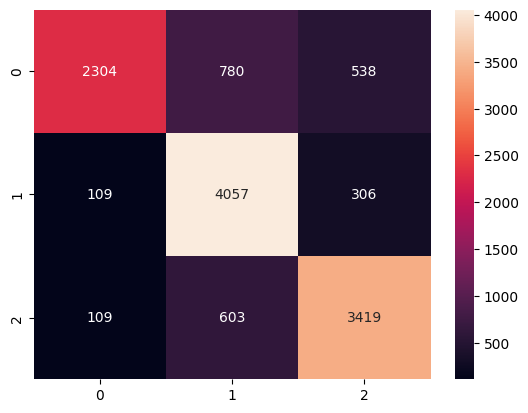

In [20]:
#KNN with CountVectorizer unigram

clf_7 = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 1))),
    ("classifier", KNeighborsClassifier(n_neighbors=5, n_jobs=-1))
])

clf_7.fit(X_train, y_train)

y_pred_7 = clf_6.predict(X_test)
print(classification_report(y_test, y_pred_7))

cm7 = confusion_matrix(y_test, y_pred_7)
sns.heatmap(cm7, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      3622
           1       0.85      0.83      0.84      4472
           2       0.86      0.81      0.84      4131

    accuracy                           0.83     12225
   macro avg       0.83      0.83      0.83     12225
weighted avg       0.84      0.83      0.83     12225



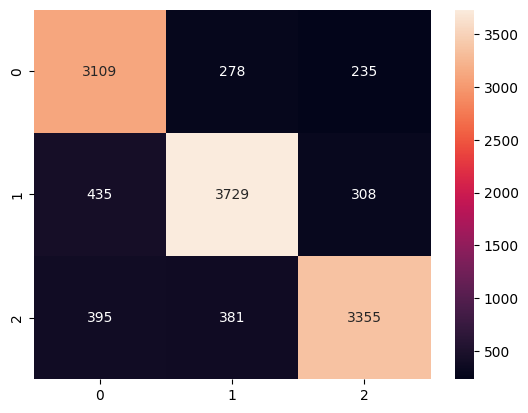

In [21]:
#KNN with CountVectorizer unigram and bigrams

clf_8 = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 2))),
    ("classifier", KNeighborsClassifier(n_neighbors=5, n_jobs=-1))
])

clf_8.fit(X_train, y_train)

y_pred_8 = clf_8.predict(X_test)
print(classification_report(y_test, y_pred_8))

cm8 = confusion_matrix(y_test, y_pred_8)
sns.heatmap(cm8, annot=True, fmt="d")
plt.show();

# Model Building with Text Preprocessing

In [22]:
import spacy
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 50.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [23]:
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_md")

def preprocess(text):
  doc = nlp(text)
  tokens = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    else:
      tokens.append(token.lemma_)
  return " ".join(tokens)

In [24]:
df4["text_preprocessed"] = df4.text.apply(preprocess)
df4.head()

,sentiment,text,sentiment_num,text_preprocessed
0,Positive,im getting on borderlands and i will murder yo...,2,m get borderland murder
1,Positive,I am coming to the borders and I will kill you...,2,come border kill
2,Positive,im getting on borderlands and i will kill you ...,2,m get borderland kill
3,Positive,im coming on borderlands and i will murder you...,2,m come borderland murder
4,Positive,im getting on borderlands 2 and i will murder ...,2,m get borderland 2 murder


In [25]:
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(df4.text_preprocessed, df4.sentiment_num, test_size=0.2, random_state=42, stratify=df4.sentiment_num)
print(X_train_pr.shape, y_train_pr.shape)
print(X_test_pr.shape, y_test_pr.shape)

(48896,) (48896,)
(12225,) (12225,)


              precision    recall  f1-score   support

           0       0.69      0.67      0.68      3622
           1       0.76      0.71      0.73      4472
           2       0.69      0.76      0.72      4131

    accuracy                           0.71     12225
   macro avg       0.71      0.71      0.71     12225
weighted avg       0.72      0.71      0.71     12225



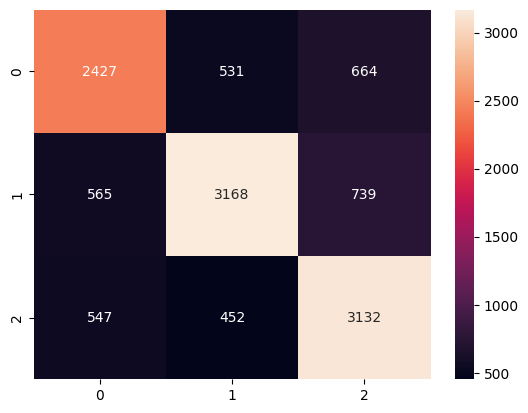

In [26]:
#Random Forest with CountVectorizer unigram

clf_9 = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 1))),
    ("classifier", RandomForestClassifier(n_estimators=100, criterion="entropy", n_jobs=-1))
])

clf_9.fit(X_train_pr, y_train_pr)

y_pred_9 = clf_1.predict(X_test_pr)
print(classification_report(y_test_pr, y_pred_9))

cm9 = confusion_matrix(y_test, y_pred_9)
sns.heatmap(cm9, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.40      0.49      0.44      3622
           1       0.51      0.46      0.48      4472
           2       0.50      0.45      0.47      4131

    accuracy                           0.47     12225
   macro avg       0.47      0.47      0.47     12225
weighted avg       0.47      0.47      0.47     12225



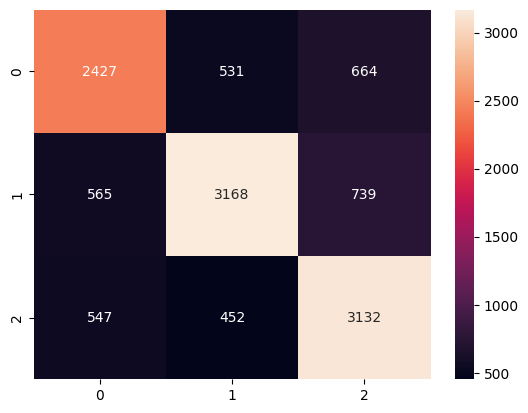

In [27]:
#Random Forest with CountVectorizer unigram & bigrams

clf_10 = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 2))),
    ("classifier", RandomForestClassifier(n_estimators=100, criterion="entropy", n_jobs=-1))
])

clf_10.fit(X_train_pr, y_train_pr)

y_pred_10 = clf_8.predict(X_test_pr)
print(classification_report(y_test_pr, y_pred_10))

cm10 = confusion_matrix(y_test, y_pred_9)
sns.heatmap(cm10, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3622
           1       0.94      0.93      0.94      4472
           2       0.89      0.95      0.92      4131

    accuracy                           0.92     12225
   macro avg       0.93      0.92      0.92     12225
weighted avg       0.93      0.92      0.92     12225



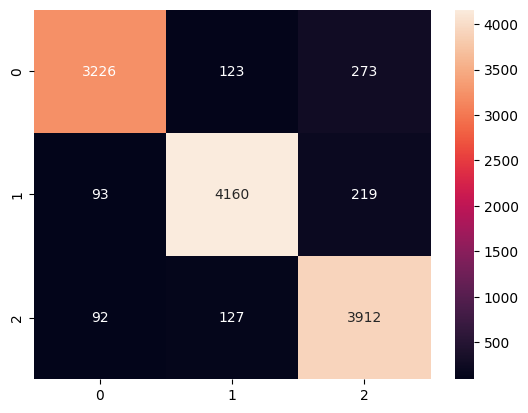

In [28]:
#Random Forest with TfIdfVectorizer

clf_11 = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("classifier", RandomForestClassifier(n_estimators=100, criterion="entropy", n_jobs=-1))
])

clf_11.fit(X_train_pr, y_train_pr)

y_pred_11 = clf_9.predict(X_test_pr)
print(classification_report(y_test_pr, y_pred_11))

cm11 = confusion_matrix(y_test, y_pred_11)
sns.heatmap(cm11, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      3622
           1       0.76      0.87      0.81      4472
           2       0.78      0.80      0.79      4131

    accuracy                           0.79     12225
   macro avg       0.80      0.78      0.79     12225
weighted avg       0.80      0.79      0.79     12225



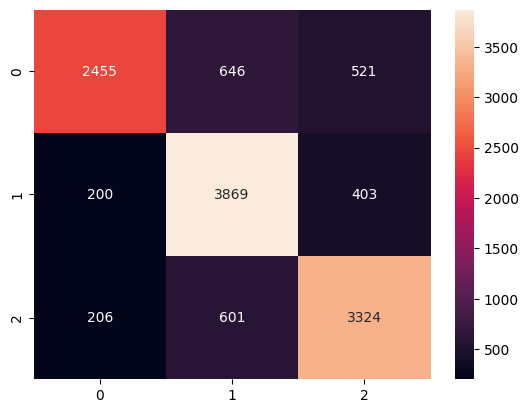

In [29]:
#MultinomialNB with CountVectorizer unigram

clf_12 = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 1))),
    ("classifier", MultinomialNB())
])

clf_12.fit(X_train_pr, y_train_pr)

y_pred_12 = clf_12.predict(X_test_pr)
print(classification_report(y_test_pr, y_pred_12))

cm12 = confusion_matrix(y_test, y_pred_12)
sns.heatmap(cm12, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3622
           1       0.88      0.94      0.91      4472
           2       0.91      0.90      0.91      4131

    accuracy                           0.90     12225
   macro avg       0.91      0.90      0.90     12225
weighted avg       0.91      0.90      0.90     12225



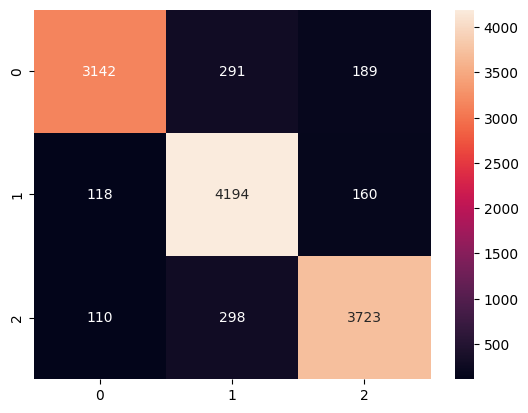

In [30]:
#MultinomialNB with CountVectorizer unigram and bigrams

clf_13 = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 2))),
    ("classifier", MultinomialNB())
])

clf_13.fit(X_train_pr, y_train_pr)

y_pred_13 = clf_13.predict(X_test_pr)
print(classification_report(y_test_pr, y_pred_13))

cm13 = confusion_matrix(y_test, y_pred_13)
sns.heatmap(cm13, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      3622
           1       0.74      0.89      0.81      4472
           2       0.80      0.81      0.80      4131

    accuracy                           0.80     12225
   macro avg       0.81      0.79      0.79     12225
weighted avg       0.81      0.80      0.79     12225



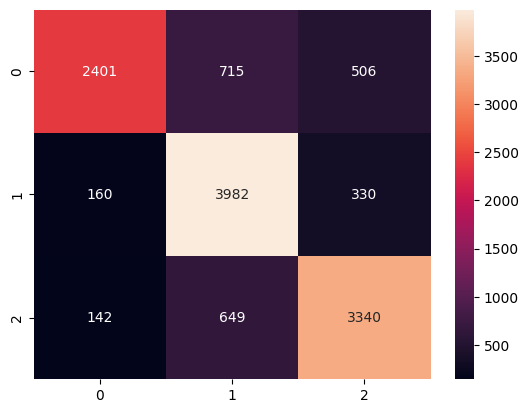

In [31]:
#MultinomialNB with TfIdfVectorizer

clf_14 = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("classifier", MultinomialNB())
])

clf_14.fit(X_train_pr, y_train_pr)

y_pred_14 = clf_14.predict(X_test_pr)
print(classification_report(y_test_pr, y_pred_14))

cm14 = confusion_matrix(y_test, y_pred_14)
sns.heatmap(cm14, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3622
           1       0.88      0.94      0.91      4472
           2       0.91      0.90      0.91      4131

    accuracy                           0.90     12225
   macro avg       0.91      0.90      0.90     12225
weighted avg       0.91      0.90      0.90     12225



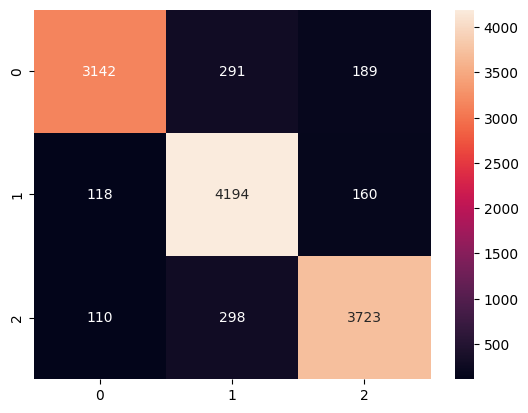

In [32]:
#KNN with CountVectorizer unigram

clf_15 = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 1))),
    ("classifier", KNeighborsClassifier(n_neighbors=5, n_jobs=-1))
])

clf_15.fit(X_train_pr, y_train_pr)

y_pred_15 = clf_13.predict(X_test_pr)
print(classification_report(y_test_pr, y_pred_15))

cm15 = confusion_matrix(y_test, y_pred_15)
sns.heatmap(cm15, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      3622
           1       0.74      0.89      0.81      4472
           2       0.80      0.81      0.80      4131

    accuracy                           0.80     12225
   macro avg       0.81      0.79      0.79     12225
weighted avg       0.81      0.80      0.79     12225



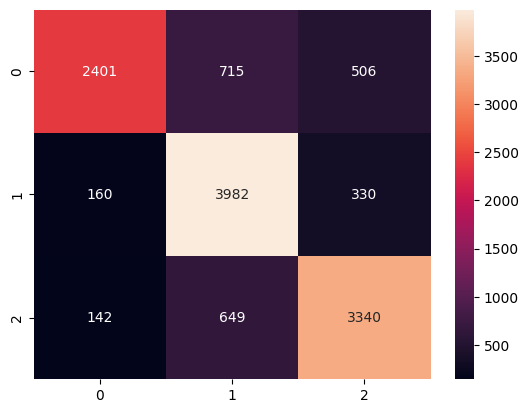

In [33]:
#KNN with CountVectorizer unigram and bigrams

clf_16 = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 2))),
    ("classifier", KNeighborsClassifier(n_neighbors=5, n_jobs=-1))
])

clf_16.fit(X_train_pr, y_train_pr)

y_pred_16 = clf_14.predict(X_test_pr)
print(classification_report(y_test_pr, y_pred_16))

cm16 = confusion_matrix(y_test, y_pred_16)
sns.heatmap(cm16, annot=True, fmt="d")
plt.show();

**Observation**
* It seems Random Forest with CountVectorizer unigram, Random Forest with CountVectorizer unigram & bigrams and Random Forest with TfIdfVectorizer are giving the best outcomes.
* So we'll go for all three and will decide the best pick from the validation set

In [34]:
column_names = ["id", "platform", "sentiment", "text"]
df_val = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv", names=column_names)
df_val.head()

,id,platform,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [35]:
df_val.isna().sum()

id           0
platform     0
sentiment    0
text         0
dtype: int64

In [36]:
df_val_2 = df_val[["sentiment", "text"]]
df_val_2.head()

,sentiment,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...


In [37]:
df_val_2.sentiment.value_counts()

sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [38]:
df_val_3 = df_val_2[df_val_2.sentiment != "Irrelevant"]
df_val_3.sentiment.value_counts()

sentiment
Neutral     285
Positive    277
Negative    266
Name: count, dtype: int64

In [39]:
sentiment_numbers = {"Neutral": 0, "Negative": 1, "Positive": 2}

df_val_3["sentiment_num"] = df_val_3.sentiment.map(sentiment_numbers)
df_val_3.head()

/tmp/ipykernel_19/2634388627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_3["sentiment_num"] = df_val_3.sentiment.map(sentiment_numbers)


,sentiment,text,sentiment_num
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,0
2,Negative,@Microsoft Why do I pay for WORD when it funct...,1
3,Negative,"CSGO matchmaking is so full of closet hacking,...",1
4,Neutral,Now the President is slapping Americans in the...,0
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,1


In [40]:
X_val = df_val_3["text"]
y_val = df_val_3["sentiment_num"]
print(X_val.shape)
print(y_val.shape)

(828,)
(828,)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       285
           1       0.98      0.98      0.98       266
           2       0.98      0.97      0.97       277

    accuracy                           0.97       828
   macro avg       0.97      0.97      0.97       828
weighted avg       0.97      0.97      0.97       828



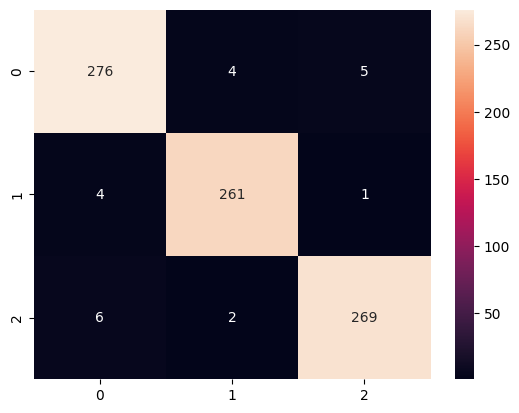

In [41]:
y_pred_val = clf_1.predict(X_val)
print(classification_report(y_val, y_pred_val))

cm_val = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm_val, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       285
           1       0.98      0.98      0.98       266
           2       0.98      0.97      0.98       277

    accuracy                           0.98       828
   macro avg       0.98      0.98      0.98       828
weighted avg       0.98      0.98      0.98       828



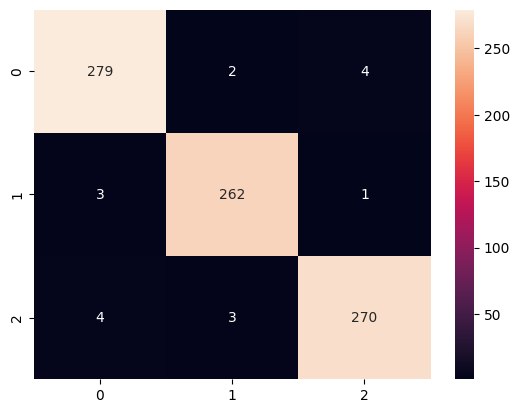

In [42]:
y_pred_val_2 = clf_2.predict(X_val)
print(classification_report(y_val, y_pred_val_2))

cm_val_2 = confusion_matrix(y_val, y_pred_val_2)
sns.heatmap(cm_val_2, annot=True, fmt="d")
plt.show();

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       285
           1       0.97      0.97      0.97       266
           2       0.98      0.97      0.98       277

    accuracy                           0.97       828
   macro avg       0.97      0.97      0.97       828
weighted avg       0.97      0.97      0.97       828



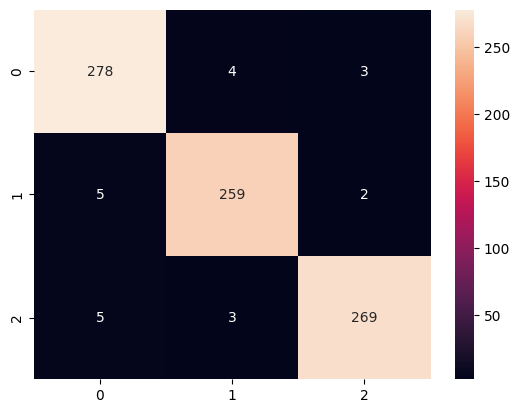

In [43]:
y_pred_val_3 = clf_3.predict(X_val)
print(classification_report(y_val, y_pred_val_3))

cm_val_3 = confusion_matrix(y_val, y_pred_val_3)
sns.heatmap(cm_val_3, annot=True, fmt="d")
plt.show();

**Observation**
* Here we're seeing Random Forest with CountVectorizer unigram and Random Forest with CountVectorizer unigram & bigrams can be the best pick.
* But for simplicity We'll go for Random Forest with CountVectorizer unigram.

In [44]:
import joblib

joblib.dump(clf_1, "/kaggle/working/random_forest_model.pkl")

['/kaggle/working/random_forest_model.pkl']